In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score
import itertools
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
# 数据导入与查看
data = pd.read_csv("./credit_data_simulate.csv")

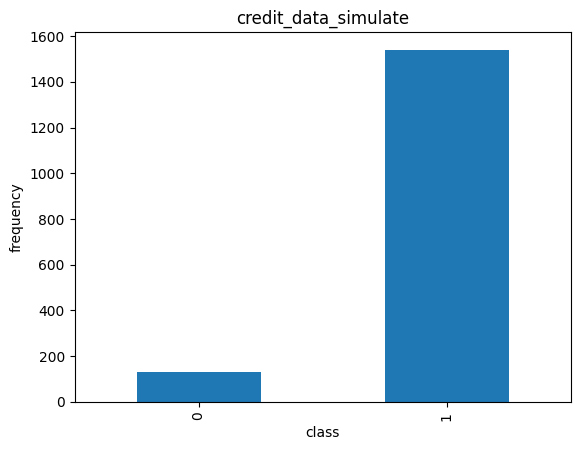

In [3]:
# 查看标签分布
count_classes = pd.value_counts(data['Credit status'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("credit_data_simulate")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [4]:
#数据标准化处理
data['Market Value of Equity / Book Value of Total Debt (MVE_BVTD)']=StandardScaler().fit_transform(data['Market Value of Equity / Book Value of Total Debt (MVE_BVTD)'].values.reshape(-1,1))
data['Industry sector labels from 1-12']=StandardScaler().fit_transform(data['Industry sector labels from 1-12'].values.reshape(-1,1))

In [5]:
X = data.iloc[:, data.columns != 'Credit status']
y = data.iloc[:, data.columns == 'Credit status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#上采样
oversampler=SMOTE(random_state=0)
X_train,y_train=oversampler.fit_resample(X_train,y_train)

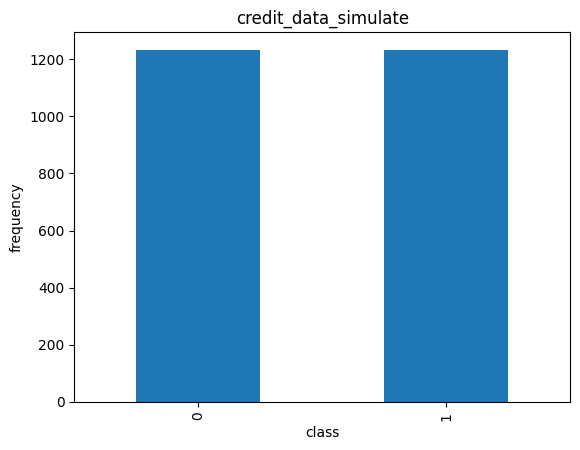

In [7]:
# 查看标签分布
count_classes = pd.value_counts(y_train['Credit status'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("credit_data_simulate")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [8]:
#进一步查看感兴趣的数据
# features_of_interest=["Revolving Credit Percentage","Debt Ratio","Capital Reserves","Num Late 60","Monthly Income","Num Credit Lines","Num Late Past 90","Num Real Estate","Num Late 90","Num Employees"]
X_train.describe()

,Working capital / Total Assets (WC_TA),Retained Earnings / Total Assets (RE_TA),Earnings Before Interests and Taxes / Total Assets (EBIT_TA),Market Value of Equity / Book Value of Total Debt (MVE_BVTD),Sales / Total Assets (S_TA),Industry sector labels from 1-12
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,0.015870,-0.263875,0.021595,-0.286901,0.290471,0.009364
std,0.327555,0.876008,0.076158,0.831944,0.299634,0.990632
min,-2.246000,-3.285000,-0.591000,-0.653207,0.032000,-1.593103
25%,-0.104887,-0.728670,0.006242,-0.632049,0.095275,-0.715635
50%,0.016680,-0.010068,0.034261,-0.488418,0.218850,0.030499
75%,0.224000,0.412750,0.063000,-0.196831,0.405000,0.746811
max,0.847000,1.772000,0.210000,19.987466,7.032000,1.624279


In [9]:
X_train = np.array(X_train,type(float))
# y_train = np.array(y_train,type(float))

In [10]:
#去离群值
#去离群值
X_train[:,0]=np.minimum(X_train[:,0],0.64)
X_train[:,1]=np.minimum(X_train[:,1],1.65)
X_train[:,2]=np.minimum(X_train[:,2],0.15)
X_train[:,3]=np.minimum(X_train[:,3],16.6)
X_train[:,4]=np.minimum(X_train[:,4],0.6)
X_train[:,5]=np.minimum(X_train[:,5],1.5)

In [11]:
bag_clf=BaggingClassifier(SVC(),n_estimators=10,bootstrap=True,max_samples=0.5)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [12]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0] 
FN = cm[0][1] 
FP = cm[1][0] 
TN = cm[1][1]
acc = (TP + TN) / (TP + FN + FP + TN)
print(bag_clf.__class__.__name__,'准确率=',acc)
sensitivity = TP / (TP + FN)
print(bag_clf.__class__.__name__,'sensitivity=',sensitivity)
specificity = TN / (TN + FP)
print(bag_clf.__class__.__name__,'specificity=',specificity)
precision=TP/(TP+FP)
print(bag_clf.__class__.__name__,'precision=',precision)
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(bag_clf.__class__.__name__,'F1_score=',F1_score)
print(classification_report(y_test,y_pred ))

BaggingClassifier 准确率= 1.0
BaggingClassifier sensitivity= 1.0
BaggingClassifier specificity= 1.0
BaggingClassifier precision= 1.0
BaggingClassifier F1_score= 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       307

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



<Figure size 640x480 with 0 Axes>

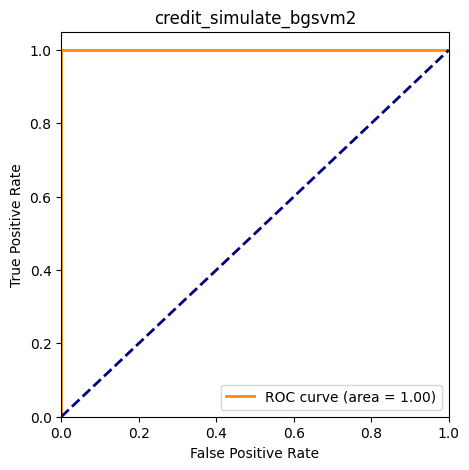

In [13]:
#ROC曲线
# 计算
fpr, tpr, thread = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
# 绘图
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('credit_simulate_bgsvm2')
plt.legend(loc="lower right")
plt.show()